# <code style="background:cyan; color:red;"> PREPARED BY : MITANSHI </code>                    

# <code style="background:CYAN;color:red;">ENSEMBLE LEARNING ML MODEL DEVELOPMENT FOR CUSTOMER CHURN PREDICTION                                                          <code style="background:yellow;color:#366ae8;">               

# <code style="background:	#77C3EC;color:#00008B;">                    IMPORTING REQUIRED LIBRARIES                         <code style="background:	#77C3EC;color:#00008B;">

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# <code style="background:	#77C3EC;color:#00008B;">                         ABOUT THE DATASET                                 <code style="background:#77C3EC;color:#00008B;">
    

- ## <code style="background:;color:#00008B;">Telecom Churn Dataset:

The **Telecom Churn Dataset** contains customer data from four major telecom partners in India: Airtel, Reliance Jio, Vodafone, and BSNL. This dataset is comprised of 243,553 rows, with each row representing information about a unique customer.

# <code style="background:	#77C3EC;color:#00008B;">                              COLUMNS                                         <code style="background:#77C3EC;color:#00008B;">

1. **`customer_id`**: A unique identifier for each customer.
2. **`telecom_partner`**: The telecom service provider to which the customer subscribes, with possible values being Airtel, Reliance Jio, Vodafone, and BSNL.
3. **`gender`**: The gender of the customer, with values "M" for male and "F" for female.
4. **`age`**: The age of the customer.
5. **`state`**: The state in India where the customer resides.
6. **`city`**: The city within the state where the customer lives.
7. **`pincode`**: The postal code (pincode) of the customer's location.
8. **`date_of_registration`**: The date when the customer registered for the telecom service.
9. **`num_dependents`**: The number of dependents (family members) the customer has.
10. **`estimated_salary`**: The estimated annual salary of the customer.
11. **`calls_made`**: The number of calls made by the customer.
12. **`sms_sent`**: The number of SMS messages sent by the customer.
13. **`data_used`**: The amount of data (in some unit of measurement, possibly megabytes or gigabytes) used by the customer.
14. **`churn`**: A binary indicator where 1 indicates that the customer has churned (canceled or stopped using the telecom service), and 0 indicates that the customer is still active with the telecom provider.

This dataset provides valuable insights into customer demographics, usage patterns, and churn behavior among customers of these telecom providers. It is a valuable resource for performing data analysis and can be used for tasks such as customer segmentation, churn prediction, and understanding the factors that influence customer behavior in the telecommunications industry.


# <code style="background:	#77C3EC;color:#00008B;">                          IMPORTING DATASET                         <code style="background:#77C3EC;color:#00008B;">

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/TELE/telecom_churn.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset.head(10)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
5,6,Vodafone,M,36,Uttarakhand,Chennai,120612,2020-01-01,1,73452,91,24,8109,0
6,7,BSNL,F,60,Karnataka,Delhi,609616,2020-01-01,1,110035,36,13,8512,0
7,8,BSNL,M,46,Arunachal Pradesh,Kolkata,866786,2020-01-01,4,104541,87,40,2245,1
8,9,Reliance Jio,F,53,Himachal Pradesh,Mumbai,765257,2020-01-01,2,79439,34,12,10039,0
9,10,BSNL,F,57,Rajasthan,Mumbai,506308,2020-01-01,0,126422,61,33,567,0


# <code style="background:	#77C3EC;color:#00008B;">                    BASIC DATASET UNDERSTANDING                    <code style="background:#77C3EC;color:#00008B;">

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [ ]:
dataset.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


# <code style="background:	#77C3EC;color:#00008B;">                          DATASET ANALYSIS                                   <code style="background:#77C3EC;color:#00008B;">

# <code style="background:#CCF381;color:#00008B;">BARPLOT

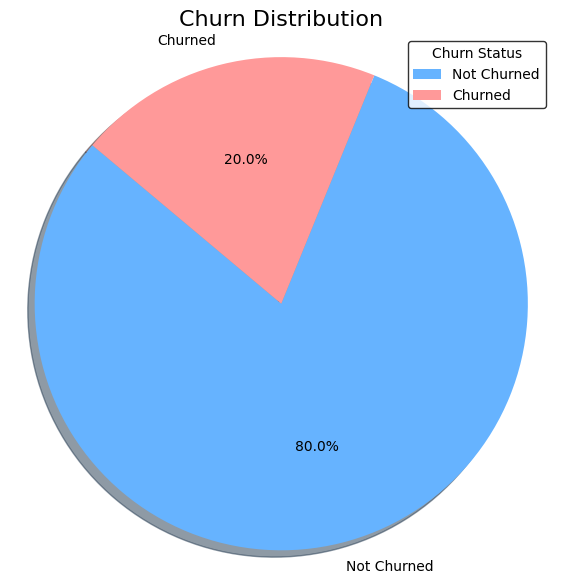

In [ ]:


# Count the number of customers in each churn category
churn_counts = dataset['churn'].value_counts()

# Define colors
colors = ['#66b3ff', '#ff9999']

# Create a pie plot
plt.figure(figsize=(7, 7))
plt.pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Churn Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

# Add a legend
plt.legend(['Not Churned', 'Churned'], title='Churn Status', loc='upper right')

# Add a border to the legend
legend = plt.gca().get_legend()
legend.set_frame_on(True)
legend.get_frame().set_edgecolor('black')

# Display the plot
plt.show()


- ## <code style="background:;color:#00008B;">Telecom Churn Dataset:
 <b><code style="color:#00008B;">Not Churned:</b> Approximately 80% of customers continue to use the service.<br>
 <b><code style="color:#00008B;">Churned:</b> Roughly 20% of customers have discontinued their service.      

# <code style="background:#CCF381;color:#00008B;">HIST AND BOX PLOT FOR AGE

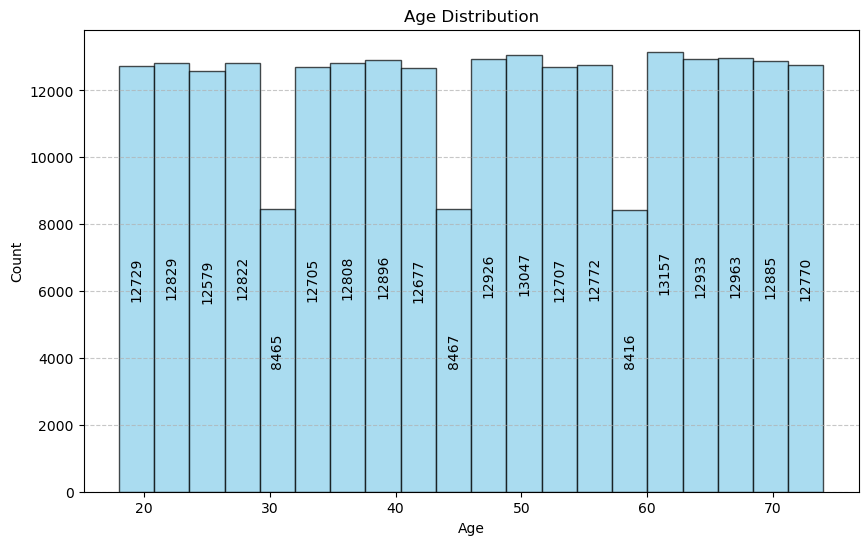

In [ ]:
import matplotlib.pyplot as plt

# Create a histogram of age distribution
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(dataset['age'], bins=20, edgecolor='k', color='skyblue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

# Add value labels in the middle of each bar vertically
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width() / 2
    y = patches[i].get_height() / 2
    plt.text(x, y, str(int(n[i])), ha='center', va='center', rotation='vertical', fontsize=10, color='black')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend (if needed)
# plt.legend(['Data'], loc='upper right')

plt.show()





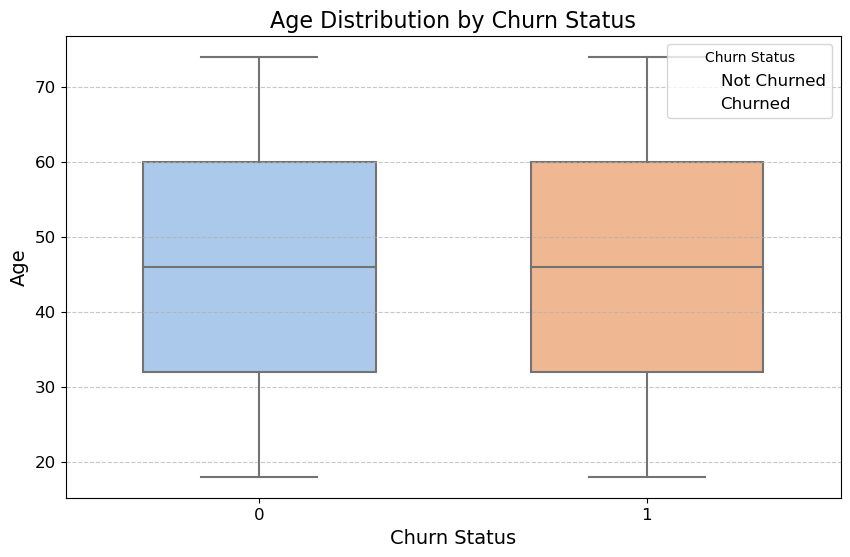

In [ ]:
# Define a light color palette
light_palette = sns.color_palette("pastel")

# Create a box plot to visualize age distribution by churn status
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, x='churn', y='age', palette=light_palette, width=0.6)

# Adding a legend
legend_labels = ['Not Churned', 'Churned']
legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label=label, markersize=8) for label in legend_labels]
plt.legend(handles=legend_handles, title='Churn Status', loc='upper right', fontsize=12)

plt.xlabel('Churn Status', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('Age Distribution by Churn Status', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


 ## <code style="background:;color:#00008B;">**Interpretation of Age Distribution by Churn Status:**
<b>The box plot illustrates the age distribution of customers categorized by their churn status.</b>

- **Similar Central Tendencies**: The median age for both "Churned" and "Not Churned" customers is positioned at the center of their respective interquartile ranges (IQR). This suggests that the typical or median age for both groups is quite similar.

- **Comparable Spread**: The symmetric appearance of the box plots indicates that the age distribution within each group has a similar spread. The IQR, which represents the middle 50% of ages, shows little variation between "Churned" and "Not Churned" customers.

- **Age Alone May Not Be Discriminatory**: Based on this analysis, it appears that age alone may not be a strong discriminatory factor in predicting churn behavior among telecom customers. While the median age is similar for both groups, it's likely that other variables, such as usage patterns, plan preferences, or customer satisfaction, play a more substantial role in determining whether a customer churns or stays.



# <code style="background:#CCF381;color:#00008B;"> BARPLOT FOR GENDER

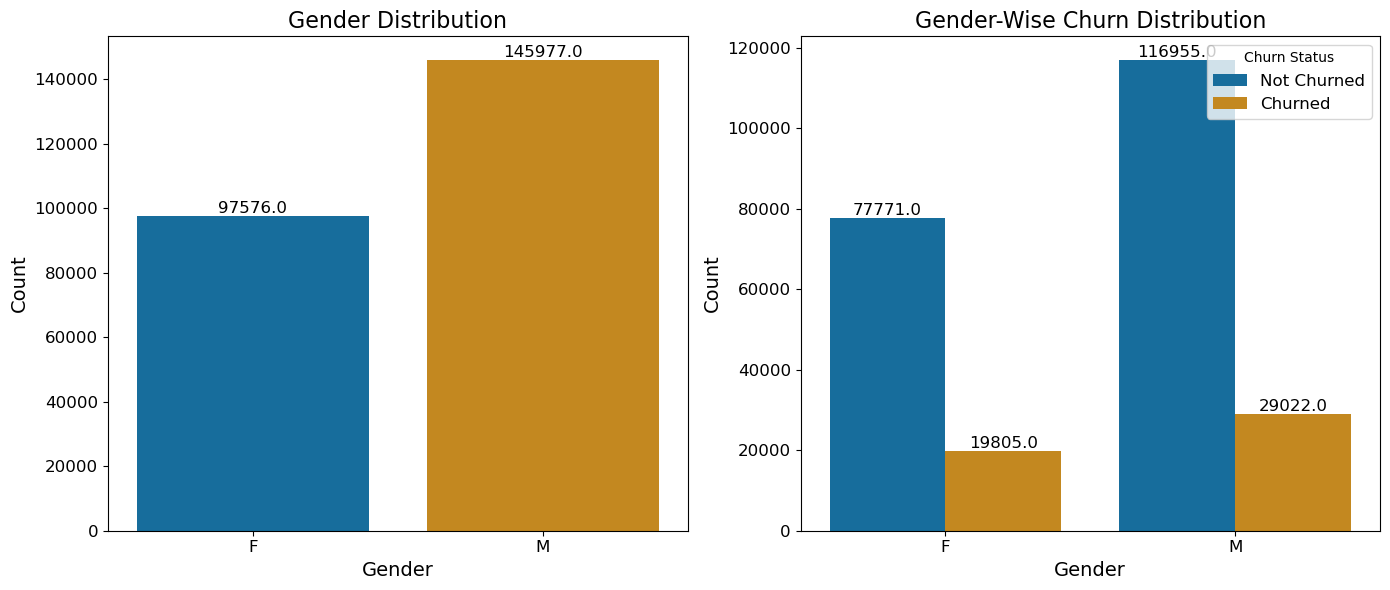

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use a colorblind-friendly color palette
colorblind_palette = sns.color_palette("colorblind")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Gender Distribution
sns.countplot(data=dataset, x='gender', palette=colorblind_palette, ax=axes[0])
axes[0].set_xlabel('Gender', fontsize=14)
axes[0].set_ylabel('Count', fontsize=14)
axes[0].set_title('Gender Distribution', fontsize=16)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Add counts on top of each bar for the first plot
for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12)

# Plot 2: Gender-Wise Churn Distribution
sns.countplot(data=dataset, x='gender', hue='churn', palette=colorblind_palette, ax=axes[1])
axes[1].set_xlabel('Gender', fontsize=14)
axes[1].set_ylabel('Count', fontsize=14)
axes[1].set_title('Gender-Wise Churn Distribution', fontsize=16)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(title='Churn Status', labels=['Not Churned', 'Churned'], loc='upper right', fontsize=12)

# Add counts on top of each bar for the second plot
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=12)

# Adjust spacing between the two plots
plt.tight_layout()

plt.show()


## <code style="background:;color:#00008B;">Insight:
- Female customers, despite being a smaller proportion of the total customer base, have a significantly higher churn rate (approximately 30%) compared to male customers (approximately 14%).

## <code style="background:;color:#00008B;">Implication:
- The telecom company should pay special attention to understanding the reasons behind this higher churn rate among female customers. This could involve conducting customer surveys, analyzing customer feedback, and potentially tailoring retention strategies specifically for female customers to reduce churn in this segment.

<b>This insight highlights a gender-based difference in churn rates, suggesting that gender may play a significant role in customer retention within the telecom industry.</b>


In [ ]:
dataset["estimated_salary"].describe()

count    243553.000000
mean      85021.137839
std       37508.963233
min       20000.000000
25%       52585.000000
50%       84990.000000
75%      117488.000000
max      149999.000000
Name: estimated_salary, dtype: float64

# <code style="background:#CCF381;color:#00008B;">LINE PLOT FOR SALARY

Churn Rate by Salary Range:
churn             Churn Rate
salary_range                
(20000, 50000]      0.201297
(50000, 75000]      0.202376
(75000, 100000]     0.201418
(100000, 125000]    0.200422
(125000, 150000]    0.196709


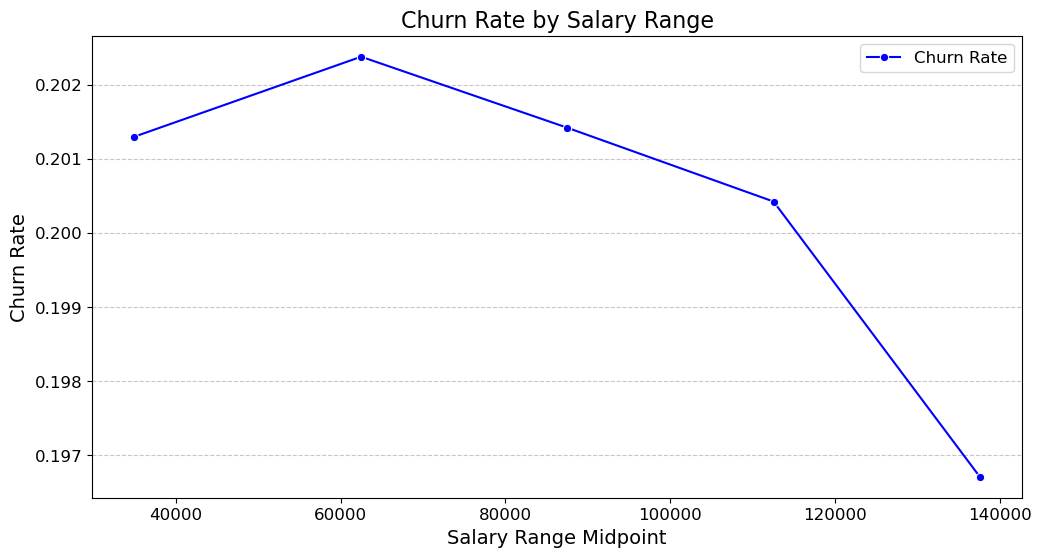

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define salary bins or ranges
salary_bins = [20000, 50000, 75000, 100000, 125000, 150000]

# Create a new column in the dataset to categorize estimated salary
dataset['salary_range'] = pd.cut(dataset['estimated_salary'], bins=salary_bins)

# Calculate churn rate for each salary range and churn status
churn_rate_by_salary = dataset.groupby(['salary_range', 'churn'])['customer_id'].count().unstack(fill_value=0)
churn_rate_by_salary['Churn Rate'] = churn_rate_by_salary[1] / (churn_rate_by_salary[0] + churn_rate_by_salary[1])

# Calculate the midpoint of each salary range for plotting
midpoints = [(low + high) / 2 for low, high in zip(salary_bins[:-1], salary_bins[1:])]

# Create a line plot for churned and not churned customers
plt.figure(figsize=(12, 6))
sns.lineplot(x=midpoints, y=churn_rate_by_salary['Churn Rate'], marker='o', color='b', linestyle='-', label='Churn Rate')
plt.xlabel('Salary Range Midpoint', fontsize=14)
plt.ylabel('Churn Rate', fontsize=14)
plt.title('Churn Rate by Salary Range', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Print the churn rate by salary range report
print("Churn Rate by Salary Range:")
print(churn_rate_by_salary[['Churn Rate']])

plt.show()


- ## <code style="background:;color:#00008B;"> **Insights from Churn Rate by Salary Range:**

1. **Consistency:** Churn rates are consistent across different salary ranges, ranging from approximately 19.67% to 20.24%.

2. **Demographics Matter:** Other demographic factors may have a more significant impact on churn.

3. **Broad Retention Strategies:** Telecom companies should focus on retention efforts applicable to customers across income levels.


In [ ]:
dataset.head(5)

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,salary_range
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0,"(100000, 125000]"
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0,"(125000, 150000]"
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1,"(125000, 150000]"
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1,"(20000, 50000]"
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0,"(50000, 75000]"


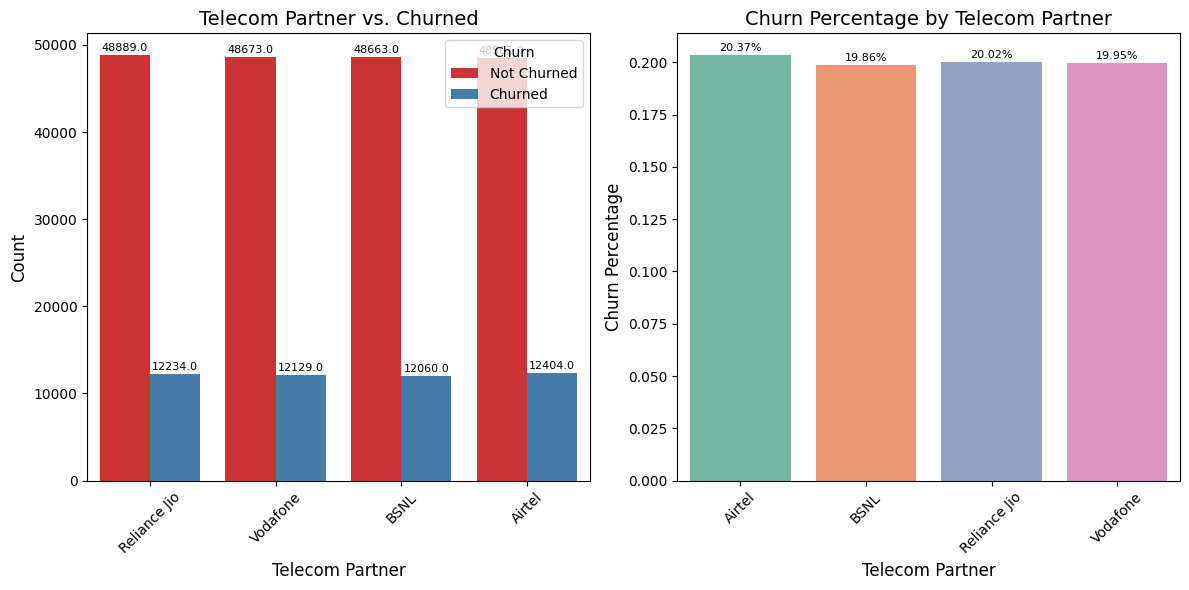


Report: Churn Analysis by Telecom Partner

Telecom PartnerTotal CustomersChurned Customers   Churn Percentage
Airtel         60905          12404               20.37%
BSNL           60723          12060               19.86%
Reliance Jio   61123          12234               20.02%
Vodafone       60802          12129               19.95%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot with two bar plots side by side
plt.figure(figsize=(12, 6))

# Subplot for Telecom Partner vs. Churned
plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=dataset, x='telecom_partner', hue='churn', palette='Set1')
plt.title('Telecom Partner vs. Churned', fontsize=14)
plt.xlabel('Telecom Partner', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Churn', labels=['Not Churned', 'Churned'], fontsize=10)

# Add vertical ticks at the middle of each bar
for p in ax1.patches:
    ax1.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Subplot for Telecom Partner vs. Churned (Percentage)
plt.subplot(1, 2, 2)
total_per_partner = dataset['telecom_partner'].value_counts()
churn_per_partner = dataset[dataset['churn'] == 1]['telecom_partner'].value_counts()
churn_percentage = (churn_per_partner / total_per_partner).sort_index()
ax2 = sns.barplot(x=churn_percentage.index, y=churn_percentage.values, palette='Set2')
plt.title('Churn Percentage by Telecom Partner', fontsize=14)
plt.xlabel('Telecom Partner', fontsize=12)
plt.ylabel('Churn Percentage', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Add vertical ticks at the middle of each bar
for p in ax2.patches:
    ax2.annotate(f"{p.get_height()*100:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

# Report in Tabular Format
print("\nReport: Churn Analysis by Telecom Partner\n")
total_customers_per_partner = dataset['telecom_partner'].value_counts()
churned_customers_per_partner = dataset[dataset['churn'] == 1]['telecom_partner'].value_counts()
churn_percentage = (churned_customers_per_partner / total_customers_per_partner).sort_index()

print(f"{'Telecom Partner':<15}{'Total Customers':<15}{'Churned Customers':<20}{'Churn Percentage':<15}")
for partner in churn_percentage.index:
    total_customers = total_customers_per_partner[partner]
    churned_customers = churned_customers_per_partner.get(partner, 0)
    percentage = churn_percentage[partner]
    print(f"{partner:<15}{total_customers:<15}{churned_customers:<20}{percentage*100:.2f}%")


## <code style="background:;color:#00008B;"> **Insight: Churn Analysis by Telecom Partner**

- The churn percentages for all major telecom partners are relatively close, ranging from approximately 19.86% (BSNL) to 20.37% (Airtel), indicating consistent churn rates.

- Airtel, Reliance Jio, and Vodafone have a similar number of total customers, each with around 61,000 customers. BSNL has slightly fewer total customers, with approximately 60,723.

- The number of churned customers varies among telecom partners, with Airtel having the highest count of churned customers (12,404), followed by Reliance Jio (12,234). BSNL and Vodafone have lower counts of churned customers.

- While the churn percentages are similar, Airtel has a slightly higher churn percentage compared to the others, suggesting the need for improved customer retention strategies.

- The competitive landscape in the telecom industry appears competitive, with similar churn rates among major players.

- Telecom partners may benefit from understanding and addressing factors influencing churn, such as network quality, pricing, and customer service.

- Partners with higher churn percentages have an opportunity to improve customer satisfaction and retention through various strategies.

Overall, the telecom industry is competitive, and telecom partners can focus on improving customer loyalty and reducing churn.


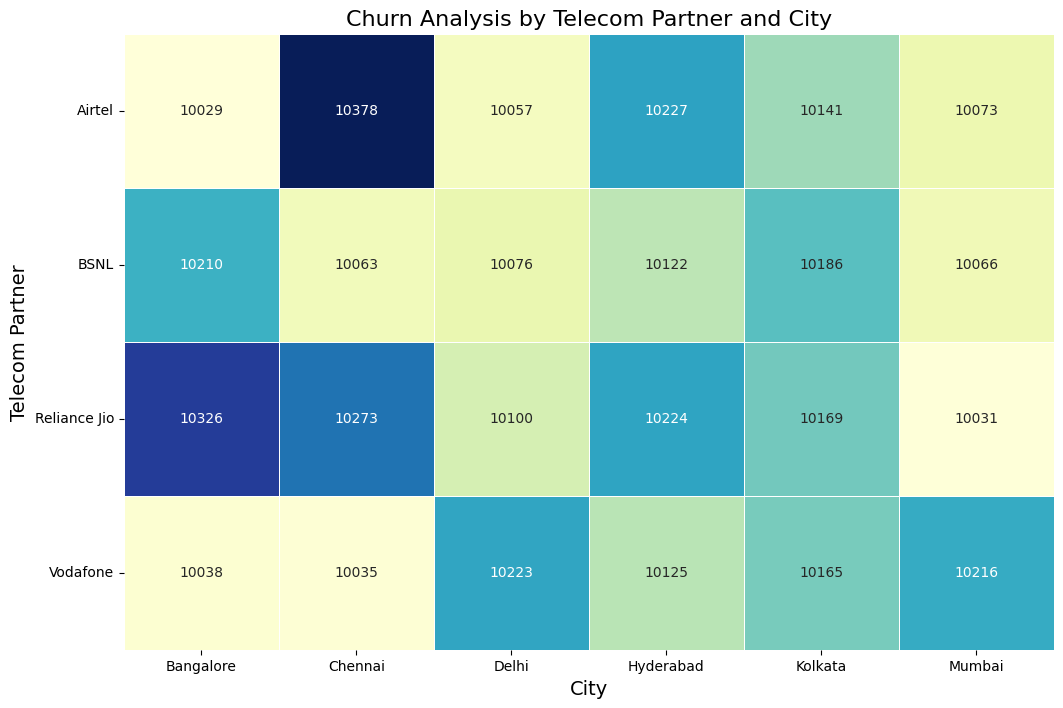

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table to count the number of customers for each combination of telecom_partner, city, and churn
pivot_table = dataset.pivot_table(index='telecom_partner', columns='city', values='churn', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=False)
plt.title('Churn Analysis by Telecom Partner and City', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Telecom Partner', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=0)
plt.show()


# <code style="background:	#77C3EC;color:#00008B;">                        CORRELATION MATRIX                                                      <code style="background:	#77C3EC;color:#00008B;">

<ipython-input-17-277f4939fe44>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


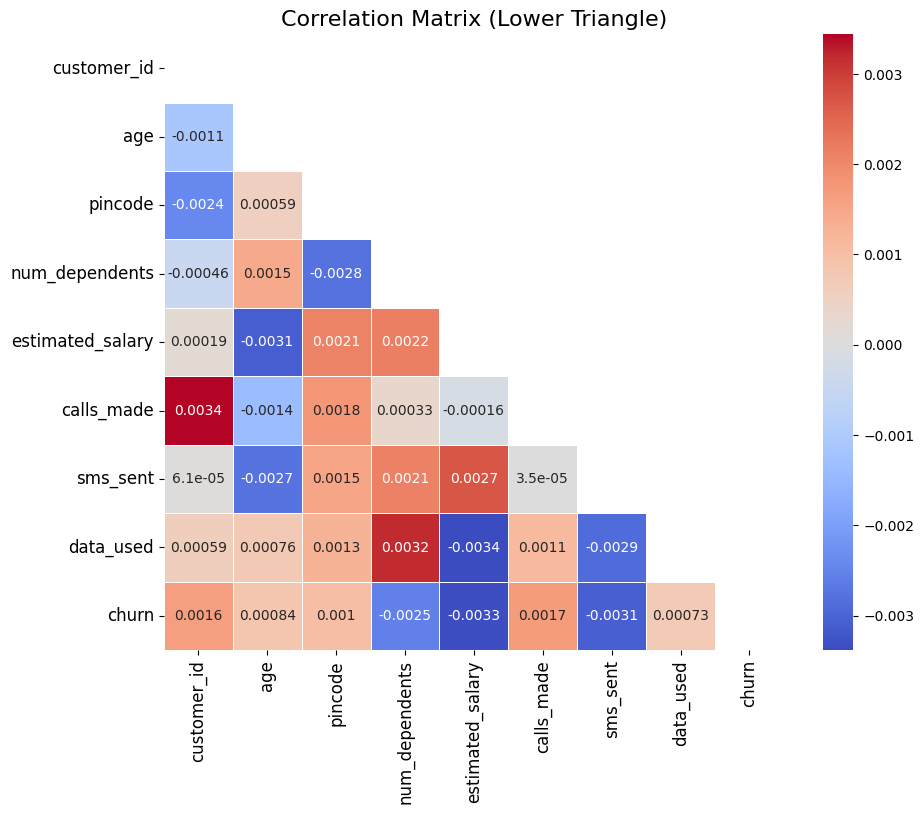

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with the mask
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Matrix (Lower Triangle)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
# Drop the specified columns permanently
columns_to_drop = ['age', 'num_dependents','sms_sent', 'data_used']
dataset.drop(columns=columns_to_drop, inplace=True)

# Display the modified dataset
dataset.head()

,customer_id,telecom_partner,gender,state,city,pincode,date_of_registration,estimated_salary,calls_made,churn,salary_range
0,1,Reliance Jio,F,Karnataka,Kolkata,755597,2020-01-01,124962,44,0,"(100000, 125000]"
1,2,Reliance Jio,F,Mizoram,Mumbai,125926,2020-01-01,130556,62,0,"(125000, 150000]"
2,3,Vodafone,F,Arunachal Pradesh,Delhi,423976,2020-01-01,148828,49,1,"(125000, 150000]"
3,4,BSNL,M,Tamil Nadu,Kolkata,522841,2020-01-01,38722,80,1,"(20000, 50000]"
4,5,BSNL,F,Tripura,Delhi,740247,2020-01-01,55098,78,0,"(50000, 75000]"


# <code style="background:	#77C3EC;color:#00008B;"> DATA PREPROCESSING

# <code style="background:#CCF381;color:#00008B;"> Handling Missing Values

In [ ]:
# Remove rows with missing values
dataset.dropna(inplace=True)

# <code style="background:#CCF381;color:#00008B;"> Encoding Categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
categorical_columns = ['telecom_partner', 'state', 'gender', 'city']
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# <code style="background:#CCF381;color:#00008B;"> Data Type Conversion

In [ ]:
# Convert date column to datetime
dataset['date_of_registration'] = pd.to_datetime(dataset['date_of_registration'])

# <code style="background:#CCF381;color:#00008B;"> Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['calls_made']
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

# <code style="background:#CCF381;color:#00008B;"> Date Features Extraction

In [ ]:
# Extract date features
dataset['registration_year'] = dataset['date_of_registration'].dt.year
dataset['registration_month'] = dataset['date_of_registration'].dt.month
dataset['registration_day'] = dataset['date_of_registration'].dt.day

# <code style="background:#CCF381;color:#00008B;"> Feature Engineering (Example: Average Calls per Day)

In [ ]:
# Create a new feature (example: average calls per day)
dataset['average_calls_per_day'] = dataset['calls_made'] / (dataset['registration_day'] + 1)  # Adding 1 to avoid division by zero


In [ ]:
dataset

,customer_id,telecom_partner,gender,state,city,pincode,date_of_registration,estimated_salary,calls_made,churn,salary_range,registration_year,registration_month,registration_day,average_calls_per_day
0,1,2,0,10,4,755597,2020-01-01,124962,-0.170111,0,"(100000, 125000]",2020,1,1,-0.085056
1,2,2,0,16,5,125926,2020-01-01,130556,0.441024,0,"(125000, 150000]",2020,1,1,0.220512
2,3,3,0,1,2,423976,2020-01-01,148828,-0.000352,1,"(125000, 150000]",2020,1,1,-0.000176
3,4,1,1,22,4,522841,2020-01-01,38722,1.052158,1,"(20000, 50000]",2020,1,1,0.526079
4,5,1,0,24,2,740247,2020-01-01,55098,0.984255,0,"(50000, 75000]",2020,1,1,0.492127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,0,0,16,4,110295,2023-05-03,130580,-0.713342,0,"(125000, 150000]",2023,5,3,-0.178336
243549,243550,2,0,2,4,713481,2023-05-03,82393,1.052158,0,"(75000, 100000]",2023,5,3,0.263040
243550,243551,2,1,24,4,520218,2023-05-03,51298,-0.781246,0,"(50000, 75000]",2023,5,3,-0.195312
243551,243552,1,1,12,4,387744,2023-05-03,83981,1.052158,0,"(75000, 100000]",2023,5,3,0.263040


In [ ]:
# Drop 'registration_month' and 'registration_day' columns
dataset.drop(['registration_month', 'registration_day','date_of_registration','salary_range'], axis=1, inplace=True)

In [ ]:
dataset

,customer_id,telecom_partner,gender,state,city,pincode,estimated_salary,calls_made,churn,registration_year,average_calls_per_day
0,1,2,0,10,4,755597,124962,-0.170111,0,2020,-0.085056
1,2,2,0,16,5,125926,130556,0.441024,0,2020,0.220512
2,3,3,0,1,2,423976,148828,-0.000352,1,2020,-0.000176
3,4,1,1,22,4,522841,38722,1.052158,1,2020,0.526079
4,5,1,0,24,2,740247,55098,0.984255,0,2020,0.492127
...,...,...,...,...,...,...,...,...,...,...,...
243548,243549,0,0,16,4,110295,130580,-0.713342,0,2023,-0.178336
243549,243550,2,0,2,4,713481,82393,1.052158,0,2023,0.263040
243550,243551,2,1,24,4,520218,51298,-0.781246,0,2023,-0.195312
243551,243552,1,1,12,4,387744,83981,1.052158,0,2023,0.263040


# <code style="background:	#77C3EC;color:#00008B;">                          APPLYING MODEL                                  <code style="background:	#77C3EC;color:#00008B;">

# <code style="background:#CCF381;color:#00008B;"> DECISION TREE

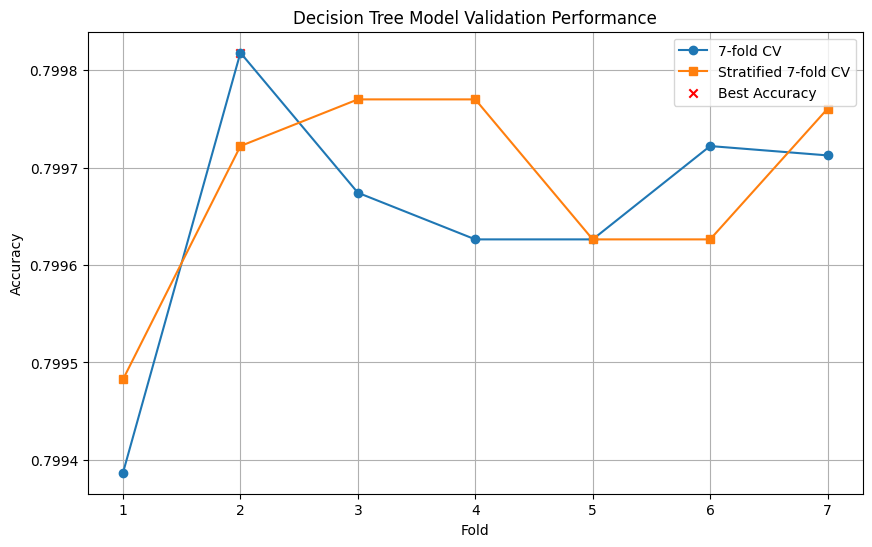

Test Accuracy (k-fold CV): 79.89%
Training Accuracy: 79.98%
Validation Accuracy: 79.92%


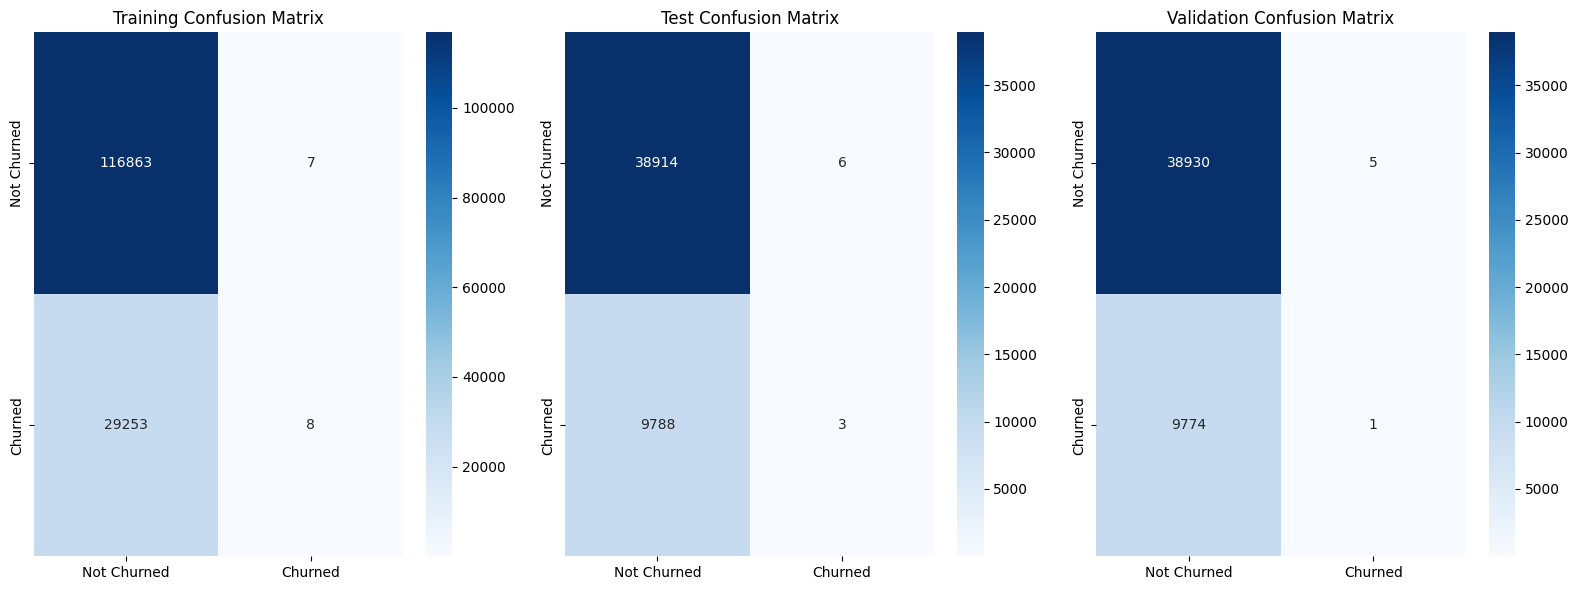

Classification Report for Test Data:
               precision    recall  f1-score   support

 Not Churned       0.80      1.00      0.89     38920
     Churned       0.33      0.00      0.00      9791

    accuracy                           0.80     48711
   macro avg       0.57      0.50      0.44     48711
weighted avg       0.71      0.80      0.71     48711



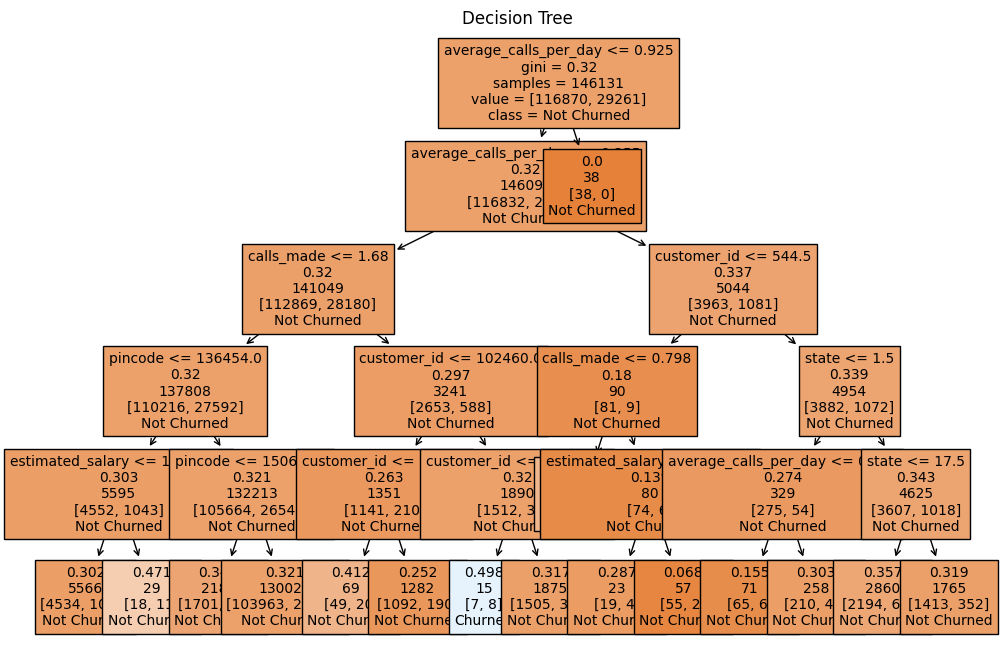

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define features and target variable
X = dataset.drop(columns=['churn'])
y = dataset['churn']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Decision Tree Classifier with limited depth and minimum samples per leaf
clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

# Technique 1: k-fold Cross-Validation with 7 folds
cv_scores = cross_val_score(clf, X_train, y_train, cv=7)

# Technique 2: Stratified k-fold Cross-Validation with 7 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
skf_scores = cross_val_score(clf, X_train, y_train, cv=skf)

# Find the fold with the highest accuracy for both techniques
best_fold_cv = np.argmax(cv_scores)
best_fold_skf = np.argmax(skf_scores)

# Determine the best validation technique and its accuracy
if cv_scores[best_fold_cv] > skf_scores[best_fold_skf]:
    best_technique = "k-fold CV"
    best_accuracy = cv_scores[best_fold_cv]
    best_indices = best_fold_cv
else:
    best_technique = "Stratified k-fold CV"
    best_accuracy = skf_scores[best_fold_skf]
    best_indices = best_fold_skf

# Plot the model validation performance using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), cv_scores, marker='o', label='7-fold CV')
plt.plot(range(1, 8), skf_scores, marker='s', label='Stratified 7-fold CV')
plt.scatter([best_indices + 1], [best_accuracy], color='red', marker='x', label='Best Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Validation Performance')
plt.legend()
plt.grid()
plt.show()

# Train the Decision Tree model using the best technique on the full training set
if best_technique == "k-fold CV":
    clf.fit(X_train, y_train)
else:
    clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)  # Re-initialize with the best technique
    clf.fit(X_train, y_train)

# Test the Decision Tree model on the test set
y_pred = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy ({best_technique}): {test_accuracy:.2f}%")

# Calculate the confusion matrices
confusion_mat_train = confusion_matrix(y_train, clf.predict(X_train))
confusion_mat_test = confusion_matrix(y_test, y_pred)
confusion_mat_valid = confusion_matrix(y_valid, clf.predict(X_valid))

# Calculate the percentage accuracy for training, testing, and validation
train_accuracy = accuracy_score(y_train, clf.predict(X_train)) * 100
valid_accuracy = accuracy_score(y_valid, clf.predict(X_valid)) * 100

# Print percentage accuracy for training, testing, and validation
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {valid_accuracy:.2f}%")

# Plot confusion matrices as heatmaps
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_mat_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Training Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Test Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_mat_valid, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Validation Confusion Matrix')

plt.tight_layout()
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])
print("Classification Report for Test Data:\n", classification_rep)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Churned', 'Churned'], label='root', fontsize=10)
plt.title('Decision Tree')
plt.show()


# <code style="background:#CCF381;color:#00008B;"> RANDOM FOREST

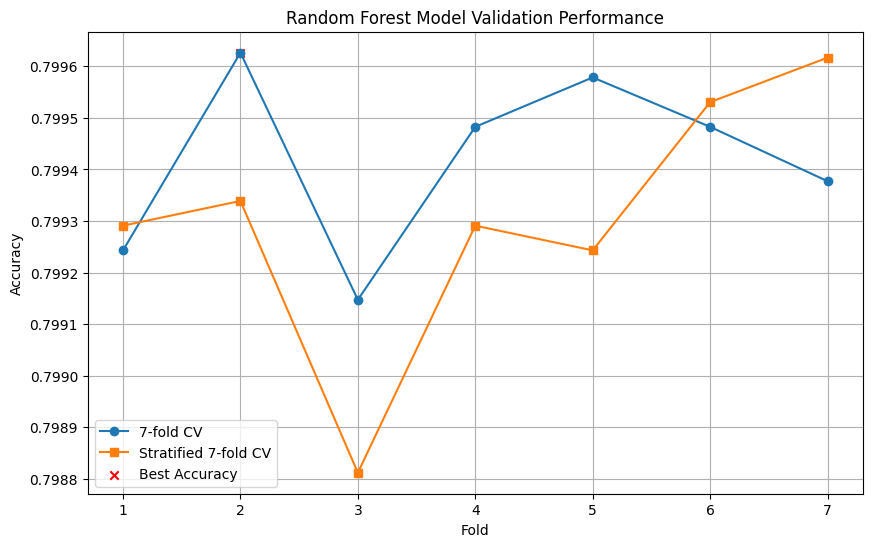

Test Accuracy (k-fold CV): 79.86%
Training Accuracy: 99.97%
Validation Accuracy: 79.89%
Number of Decision Trees in Random Forest: 50


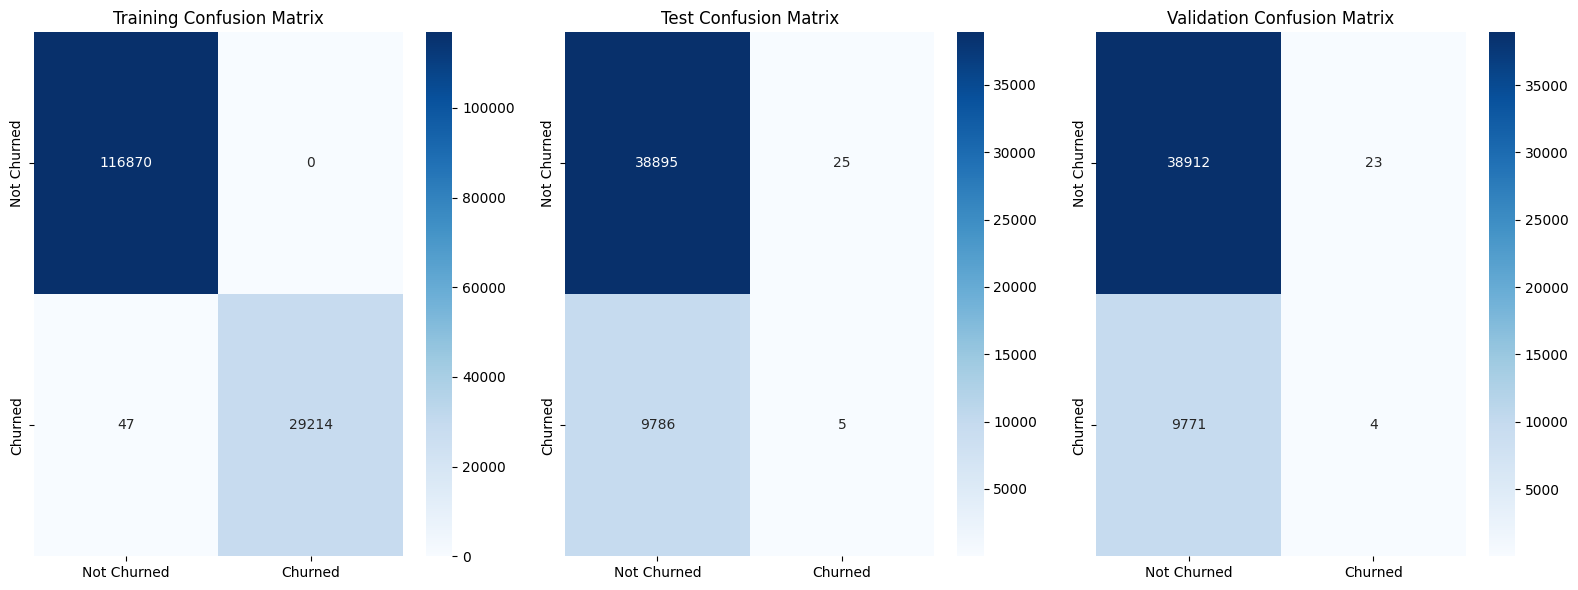

Classification Report for Test Data:
               precision    recall  f1-score   support

 Not Churned       0.80      1.00      0.89     38920
     Churned       0.17      0.00      0.00      9791

    accuracy                           0.80     48711
   macro avg       0.48      0.50      0.44     48711
weighted avg       0.67      0.80      0.71     48711



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define features and target variable
X = dataset.drop(columns=['churn'])
y = dataset['churn']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest Classifier with a specified number of decision trees
num_decision_trees = 50  # You can adjust this number
rf = RandomForestClassifier(n_estimators=num_decision_trees, random_state=42)

# Technique 1: k-fold Cross-Validation with 7 folds
cv_scores = cross_val_score(rf, X_train, y_train, cv=7)

# Technique 2: Stratified k-fold Cross-Validation with 7 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
skf_scores = cross_val_score(rf, X_train, y_train, cv=skf)

# Find the fold with the highest accuracy for both techniques
best_fold_cv = np.argmax(cv_scores)
best_fold_skf = np.argmax(skf_scores)

# Determine the best validation technique and its accuracy
if cv_scores[best_fold_cv] > skf_scores[best_fold_skf]:
    best_technique = "k-fold CV"
    best_accuracy = cv_scores[best_fold_cv]
    best_indices = best_fold_cv
else:
    best_technique = "Stratified k-fold CV"
    best_accuracy = skf_scores[best_fold_skf]
    best_indices = best_fold_skf

# Plot the model validation performance using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), cv_scores, marker='o', label='7-fold CV')
plt.plot(range(1, 8), skf_scores, marker='s', label='Stratified 7-fold CV')
plt.scatter([best_indices + 1], [best_accuracy], color='red', marker='x', label='Best Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Random Forest Model Validation Performance')
plt.legend()
plt.grid()
plt.show()

# Train the Random Forest model using the best technique on the full training set
if best_technique == "k-fold CV":
    rf.fit(X_train, y_train)
else:
    rf = RandomForestClassifier(n_estimators=num_decision_trees, random_state=42)  # Re-initialize with the best technique
    rf.fit(X_train, y_train)

# Test the Random Forest model on the test set
y_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy ({best_technique}): {test_accuracy:.2f}%")

# Calculate the confusion matrices
confusion_mat_train = confusion_matrix(y_train, rf.predict(X_train))
confusion_mat_test = confusion_matrix(y_test, y_pred)
confusion_mat_valid = confusion_matrix(y_valid, rf.predict(X_valid))

# Calculate the percentage accuracy for training, testing, and validation
train_accuracy = accuracy_score(y_train, rf.predict(X_train)) * 100
valid_accuracy = accuracy_score(y_valid, rf.predict(X_valid)) * 100

# Print percentage accuracy for training, testing, and validation
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {valid_accuracy:.2f}%")

# Print the number of decision trees in the Random Forest
print(f"Number of Decision Trees in Random Forest: {num_decision_trees}")

# Plot confusion matrices as heatmaps
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_mat_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Training Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Test Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_mat_valid, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Validation Confusion Matrix')

plt.tight_layout()
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])
print("Classification Report for Test Data:\n", classification_rep)

# <code style="background:#CCF381;color:#00008B;"> GRADIENT BOOSTING

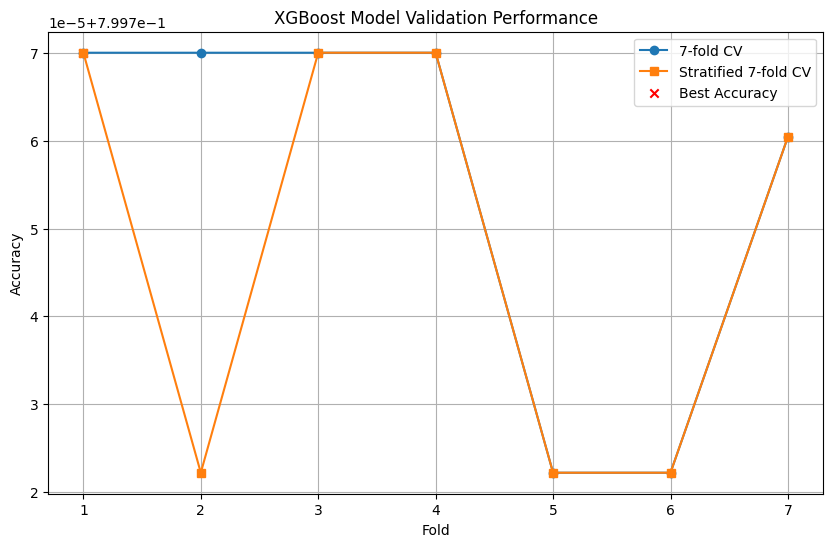

Test Accuracy (Stratified k-fold CV): 79.90%
Training Accuracy: 79.98%
Validation Accuracy: 79.93%
Number of Boosting Rounds: 99


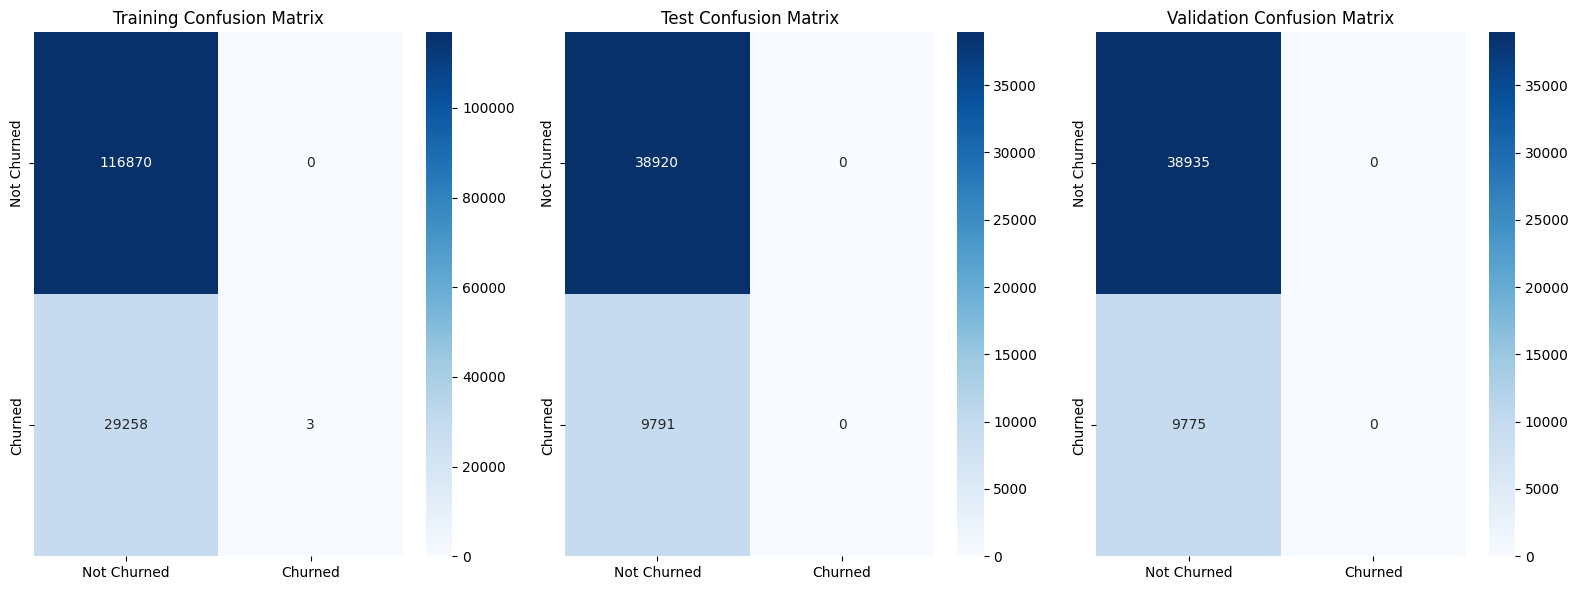

Classification Report for Test Data:
               precision    recall  f1-score   support

 Not Churned       0.80      1.00      0.89     38920
     Churned       0.00      0.00      0.00      9791

    accuracy                           0.80     48711
   macro avg       0.40      0.50      0.44     48711
weighted avg       0.64      0.80      0.71     48711



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb  # Import XGBoost
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define features and target variable
X = dataset.drop(columns=['churn'])
y = dataset['churn']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the XGBoost Classifier with adjusted hyperparameters
xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Technique 1: k-fold Cross-Validation with 7 folds
cv_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=7)

# Technique 2: Stratified k-fold Cross-Validation with 7 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
skf_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=skf)

# Find the fold with the highest accuracy for both techniques
best_fold_cv = np.argmax(cv_scores)
best_fold_skf = np.argmax(skf_scores)

# Determine the best validation technique and its accuracy
if cv_scores[best_fold_cv] > skf_scores[best_fold_skf]:
    best_technique = "k-fold CV"
    best_accuracy = cv_scores[best_fold_cv]
    best_indices = best_fold_cv
else:
    best_technique = "Stratified k-fold CV"
    best_accuracy = skf_scores[best_fold_skf]
    best_indices = best_fold_skf

# Plot the model validation performance using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), cv_scores, marker='o', label='7-fold CV')
plt.plot(range(1, 8), skf_scores, marker='s', label='Stratified 7-fold CV')
plt.scatter([best_indices + 1], [best_accuracy], color='red', marker='x', label='Best Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('XGBoost Model Validation Performance')
plt.legend()
plt.grid()
plt.show()

# Train the XGBoost model using the best technique on the full training set
if best_technique == "k-fold CV":
    xgb_classifier.fit(X_train, y_train)
else:
    xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)  # Re-initialize with the best technique
    xgb_classifier.fit(X_train, y_train)

# Test the XGBoost model on the test set
y_pred = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy ({best_technique}): {test_accuracy:.2f}%")

# Calculate the confusion matrices
confusion_mat_train = confusion_matrix(y_train, xgb_classifier.predict(X_train))
confusion_mat_test = confusion_matrix(y_test, y_pred)
confusion_mat_valid = confusion_matrix(y_valid, xgb_classifier.predict(X_valid))

# Calculate the percentage accuracy for training, testing, and validation
train_accuracy = accuracy_score(y_train, xgb_classifier.predict(X_train)) * 100
valid_accuracy = accuracy_score(y_valid, xgb_classifier.predict(X_valid)) * 100

# Print percentage accuracy for training, testing, and validation
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {valid_accuracy:.2f}%")

# Print the number of boosting rounds used
print(f"Number of Boosting Rounds: {xgb_classifier.best_iteration}")

# Plot confusion matrices as heatmaps
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_mat_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Training Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Test Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_mat_valid, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Validation Confusion Matrix')

plt.tight_layout()
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])
print("Classification Report for Test Data:\n", classification_rep)


# <code style="background:#CCF381;color:#00008B;"> ADABOOST

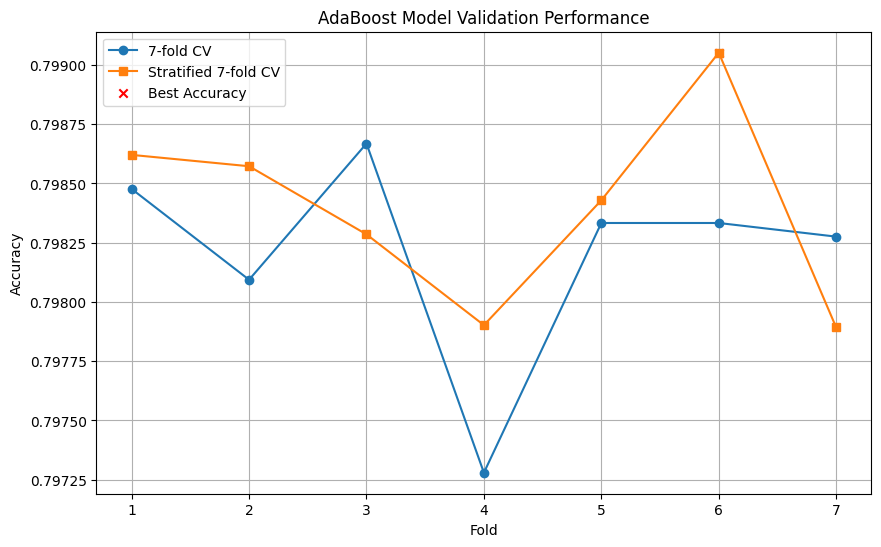

Test Accuracy (Stratified k-fold CV): 79.78%
Training Accuracy: 80.07%
Validation Accuracy: 79.83%


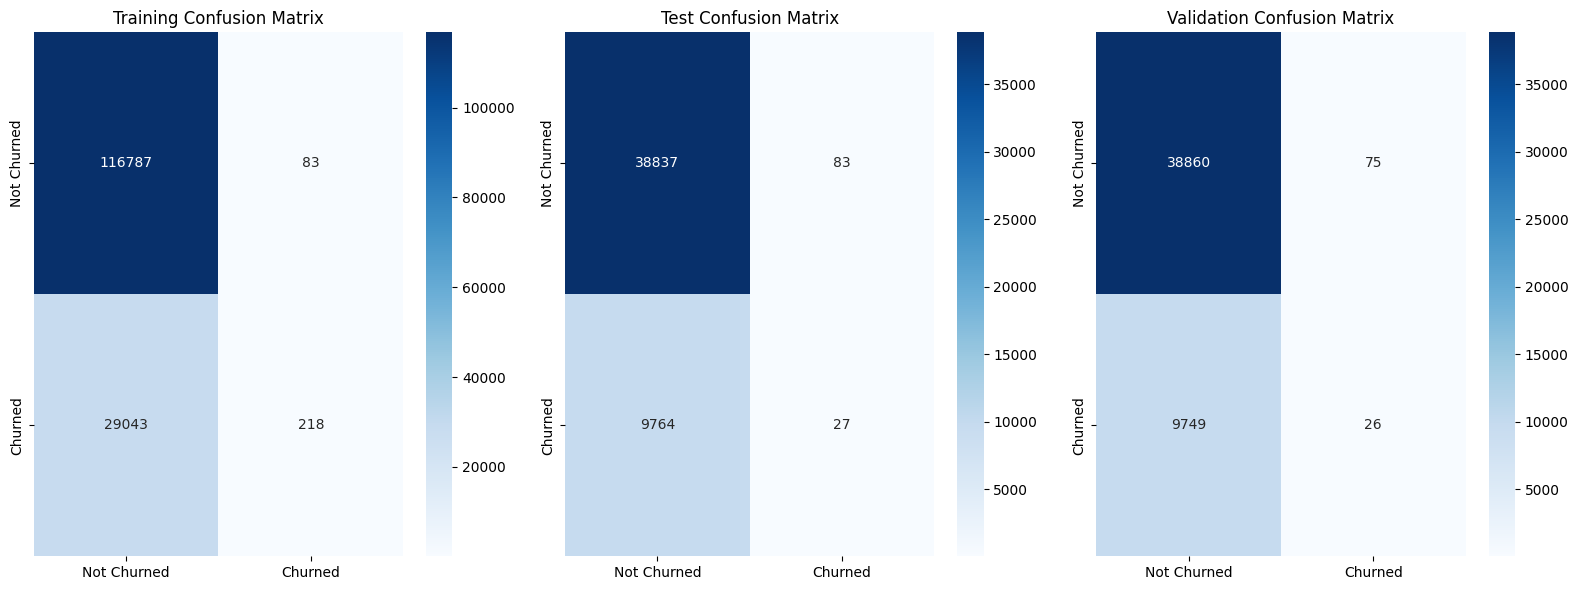

Classification Report for Test Data:
               precision    recall  f1-score   support

 Not Churned       0.80      1.00      0.89     38920
     Churned       0.25      0.00      0.01      9791

    accuracy                           0.80     48711
   macro avg       0.52      0.50      0.45     48711
weighted avg       0.69      0.80      0.71     48711



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Define features and target variable
X = dataset.drop(columns=['churn'])
y = dataset['churn']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the base Decision Tree Classifier
base_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)

# Initialize the AdaBoost Classifier with the base classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

# Technique 1: k-fold Cross-Validation with 7 folds
cv_scores = cross_val_score(adaboost_classifier, X_train, y_train, cv=7)

# Technique 2: Stratified k-fold Cross-Validation with 7 folds
skf = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)
skf_scores = cross_val_score(adaboost_classifier, X_train, y_train, cv=skf)

# Find the fold with the highest accuracy for both techniques
best_fold_cv = np.argmax(cv_scores)
best_fold_skf = np.argmax(skf_scores)

# Determine the best validation technique and its accuracy
if cv_scores[best_fold_cv] > skf_scores[best_fold_skf]:
    best_technique = "k-fold CV"
    best_accuracy = cv_scores[best_fold_cv]
    best_indices = best_fold_cv
else:
    best_technique = "Stratified k-fold CV"
    best_accuracy = skf_scores[best_fold_skf]
    best_indices = best_fold_skf

# Plot the model validation performance using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), cv_scores, marker='o', label='7-fold CV')
plt.plot(range(1, 8), skf_scores, marker='s', label='Stratified 7-fold CV')
plt.scatter([best_indices + 1], [best_accuracy], color='red', marker='x', label='Best Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('AdaBoost Model Validation Performance')
plt.legend()
plt.grid()
plt.show()

# Train the AdaBoost model using the best technique on the full training set
if best_technique == "k-fold CV":
    adaboost_classifier.fit(X_train, y_train)
else:
    adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)  # Re-initialize with the best technique
    adaboost_classifier.fit(X_train, y_train)

# Test the AdaBoost model on the test set
y_pred = adaboost_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Test Accuracy ({best_technique}): {test_accuracy:.2f}%")

# Calculate the confusion matrices
confusion_mat_train = confusion_matrix(y_train, adaboost_classifier.predict(X_train))
confusion_mat_test = confusion_matrix(y_test, y_pred)
confusion_mat_valid = confusion_matrix(y_valid, adaboost_classifier.predict(X_valid))

# Calculate the percentage accuracy for training, testing, and validation
train_accuracy = accuracy_score(y_train, adaboost_classifier.predict(X_train)) * 100
valid_accuracy = accuracy_score(y_valid, adaboost_classifier.predict(X_valid)) * 100

# Print percentage accuracy for training, testing, and validation
print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {valid_accuracy:.2f}%")

# Plot confusion matrices as heatmaps
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_mat_train, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Training Confusion Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(confusion_mat_test, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Test Confusion Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(confusion_mat_valid, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Validation Confusion Matrix')

plt.tight_layout()
plt.show()

# Classification Report
classification_rep = classification_report(y_test, y_pred, target_names=['Not Churned', 'Churned'])
print("Classification Report for Test Data:\n", classification_rep)


# <code style="background:	#77C3EC;color:#00008B;">                        MODEL EVALUATION                                  <code style="background:	#77C3EC;color:#00008B;">

<ipython-input-60-4704c97920d5>:51: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in legend.legendHandles:


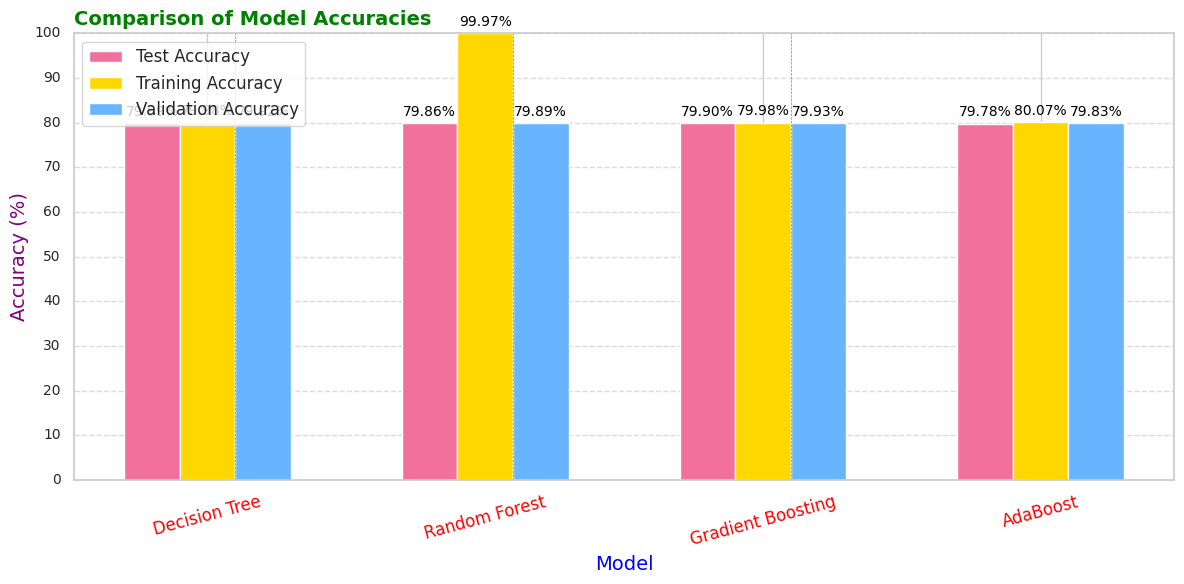

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Test accuracies
test_accuracies = [79.89, 79.86, 79.90, 79.78]

# Training accuracies
training_accuracies = [79.98, 99.97, 79.98, 80.07]

# Validation accuracies
validation_accuracies = [79.92, 79.89, 79.93, 79.83]

# Model names
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting", "AdaBoost"]

# Create a DataFrame
df = pd.DataFrame({
    "Model": model_names,
    "Test Accuracy": test_accuracies,
    "Training Accuracy": training_accuracies,
    "Validation Accuracy": validation_accuracies
})

# Set custom colors for the bars
colors = ["#F2709C", "#FFD700", "#69B4FF"]

# Set the seaborn style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust figure size for better visibility
palette = sns.color_palette(colors)
bar_width = 0.2
index = np.arange(len(model_names))

# Plot bars
plt.bar(index, df["Test Accuracy"], bar_width, label='Test Accuracy', color=palette[0])
plt.bar(index + bar_width, df["Training Accuracy"], bar_width, label='Training Accuracy', color=palette[1])
plt.bar(index + 2 * bar_width, df["Validation Accuracy"], bar_width, label='Validation Accuracy', color=palette[2])

# Customize the plot
plt.xlabel('Model', fontsize=14, color='blue')
plt.ylabel('Accuracy (%)', fontsize=14, color='purple')
plt.title('Comparison of Model Accuracies', fontsize=14, fontweight='bold', color='green', loc='left')  # Align title to the left
plt.xticks(index + bar_width, model_names, fontsize=12, rotation=15, color='red')

# Adjust the transparency of the legend
legend = plt.legend(loc='upper left', fontsize=12)
for lh in legend.legendHandles:
    lh.set_alpha(1)  # Set the alpha (transparency) value

# Add accuracy values in the middle and vertically aligned with each bar
font_size = 10
for i in range(len(model_names)):
    plt.text(index[i], df["Test Accuracy"][i] + 1, f'{df["Test Accuracy"][i]:.2f}%', ha='center', va='bottom', fontsize=font_size, color='black')
    plt.text(index[i] + bar_width, df["Training Accuracy"][i] + 1, f'{df["Training Accuracy"][i]:.2f}%', ha='center', va='bottom', fontsize=font_size, color='black')
    plt.text(index[i] + 2 * bar_width, df["Validation Accuracy"][i] + 1, f'{df["Validation Accuracy"][i]:.2f}%', ha='center', va='bottom', fontsize=font_size, color='black')

# Add vertical lines between bars
for i in range(len(model_names) - 1):
    plt.axvline(x=index[i] + 3 * bar_width / 2, color='gray', linestyle='--', linewidth=0.5)

# Set y-axis ticks and limits with a 10-unit gap
plt.yticks(np.arange(0, 101, 10), fontsize=10, rotation=0, va='center')
plt.ylim(0, 100)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
